
=================================================
This program was created to analyze sales data to get the best marketing strategy. 
=================================================


*Link Dasboard =*  https://public.tableau.com/views/Milestone2_17376416298100/DashboardDataPenjualan?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

# Business Objective

Want to know the most sold product categories and the factors that influence them so that it can help the team to determine future sales strategies.

# Problem Identification

Using the SMART Framework:
- S : Want to know what product categories are sold the most
- M : The number of sales per product category can be measured by looking at which location has the highest sales.
- A : Analyze the highest selling product categories and what factors influence them using variable analysis.
- R : Focusing on developing marketing strategies on the regions with the highest sales and the most influential factors in sales.
- T : Analysis results are targeted in the next 6 months

*Problem statement :* Identify what are the highest products and factors through statistical analysis by focusing on strategy development for the next 6 months.

# Breaking Down The Problem

*5W + 1H method:*
- what product categories have the most purchases
- what is the age range that makes the most purchases
- which location has the highest number of sales
- what is the average expenditure to buy a product based on gender
- how does the rating relate to the buyer's age, price, and previous purchases
- is there a difference in total sales in the summer and winter seasons

# Data Loading

*Dataset Source:* https://www.kaggle.com/datasets/bhadramohit/customer-shopping-latest-trends-dataset/data

In [255]:
# memamnggil library yang dibutuhkan untuk data loading dan analisis data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind

In [256]:
# membaca csv untuk dimasukkan kedalam dataframe

df = pd.read_csv('shopping_trends.csv')
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [257]:
# mengecek berapa jumlah kolom dan baris

print('jumlah kolom: ',df.shape[1]) # berapa jumlah kolom
print('jumlah baris: ',df.shape[0]) # berapa jumlah baris

jumlah kolom:  19
jumlah baris:  3900


In [258]:
# mengecek informasi dari dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [259]:
# mengecek data duplikasi yang ada di dataframe

df.duplicated().sum()

0

In [260]:
# mengecek apakah ada data yang hilang di dalam dataframe

df.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [261]:
# Menghapus column yang tidak diperlukan

df = df.drop(['Size', 'Color', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases'], axis=1)
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Season,Review Rating,Previous Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,Winter,3.1,14
1,2,19,Male,Sweater,Clothing,64,Maine,Winter,3.1,2
2,3,50,Male,Jeans,Clothing,73,Massachusetts,Spring,3.1,23
3,4,21,Male,Sandals,Footwear,90,Rhode Island,Spring,3.5,49
4,5,45,Male,Blouse,Clothing,49,Oregon,Spring,2.7,31
...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,Summer,4.2,32
3896,3897,52,Female,Backpack,Accessories,49,Iowa,Spring,4.5,41
3897,3898,46,Female,Belt,Accessories,33,New Jersey,Spring,2.9,24
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,Summer,3.8,24


In [262]:
df['Customer ID'] = df['Customer ID'].astype(str)

In [263]:
# crosscheck kembali data yang sudah di cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer ID            3900 non-null   object 
 1   Age                    3900 non-null   int64  
 2   Gender                 3900 non-null   object 
 3   Item Purchased         3900 non-null   object 
 4   Category               3900 non-null   object 
 5   Purchase Amount (USD)  3900 non-null   int64  
 6   Location               3900 non-null   object 
 7   Season                 3900 non-null   object 
 8   Review Rating          3900 non-null   float64
 9   Previous Purchases     3900 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 304.8+ KB


In [264]:
# memindahkan kembali dataframe yang sudah di cleaning menjadi csv

df.to_csv("shopping_trends_cleaned.csv", index=False)

# Analysis and Calculation

**EDA**

**Q1 : Which product categories have the most purchases**

In [265]:
kategori = df['Category'].value_counts().reset_index()
kategori

,Category,count
0,Clothing,1737
1,Accessories,1240
2,Footwear,599
3,Outerwear,324


<Axes: xlabel='Category', ylabel='count'>

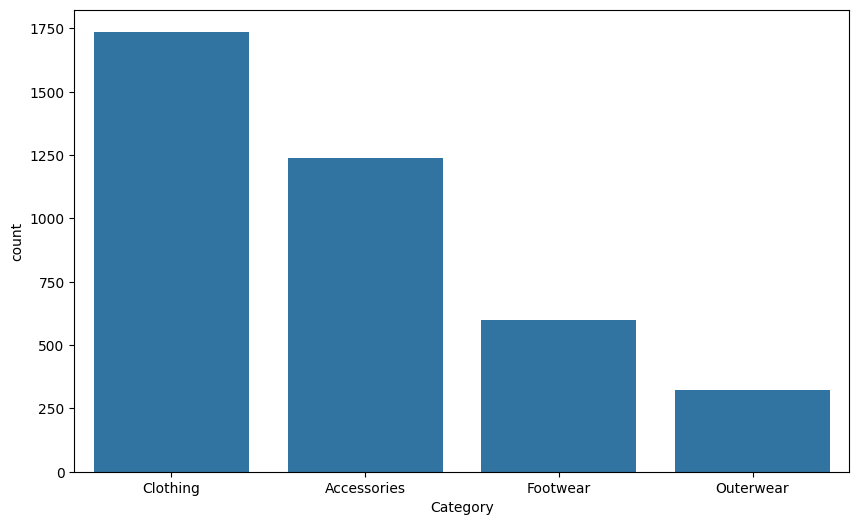

In [266]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='count', data=kategori)

It can be seen from the chart above, the most sales per category are in the Clothing category with sales of 1737, followed by the Accessories and Footwear categories.

**Q2 : What age range makes the most purchases**.

Checking what is the minimum and maximum age contained in the data

In [267]:
# mengecek berapakah umur minimal dan maksimal yang terdapat pada data
min = df['Age'].min()
max = df['Age'].max()
print("Umur terkecil yang melakukan pembelian :", min)
print("Umur terbesar yang melakukan pembelian :", max)

Umur terkecil yang melakukan pembelian : 18
Umur terbesar yang melakukan pembelian : 70


- Minimum age contained in the data is 18 years (rounded to 20)
- The maximum age contained in the data is 70 years old
- Using age range to display data

In [268]:
# menggunakan rentang umur sebesar untuk menampilkan data
rentang = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
label = ['20-25', '26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70']

# Membagi data ke dalam rentang umur
df['Rentang'] = pd.cut(df['Age'], bins=rentang, labels=label, right=True)

# Menghitung jumlah data di dalam rentang umur
rentang_umur = df.groupby('Rentang').size().reset_index(name='Jumlah')
rentang_umur = rentang_umur.sort_values(by='Rentang', ascending=True)
# Menampilkan hasil
print(rentang_umur)

  Rentang  Jumlah
0   20-25     359
1   26-30     378
2   31-35     364
3   36-40     361
4   41-45     368
5   46-50     382
6   51-55     371
7   56-60     382
8   61-65     368
9   66-70     355


Display age range result plot

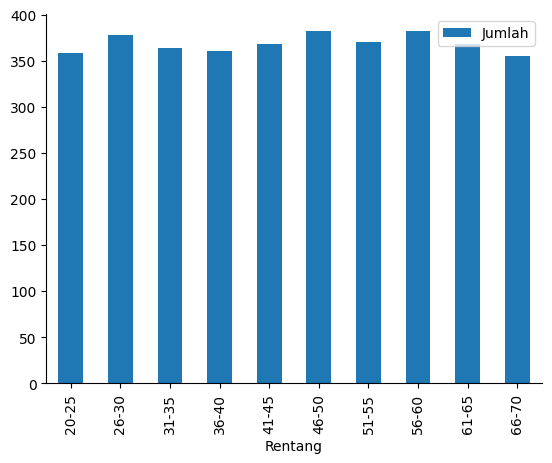

In [269]:
# menampilkan plot hasil rentang_umur
rentang_umur.plot(kind='bar', x='Rentang', y='Jumlah')
plt.gca().spines[['top', 'right',]].set_visible(False)

It can be seen from the graph above, that the most buyers are in the 46-50 age range with a total of 382 purchases and the least purchase age range is in the 66-70 range with a total of 355 purchases.

**Q3 : Which location has the highest number of sales**

In [270]:
# mengelompokkan data location dengan total data previous purchases untuk mendapatkan total jumlah pembelian terbanyak
location = df['Location'].value_counts().reset_index(name='Total')
location
# mengambil 5 lokasi dengan jumlah pembelian terbanyak
top_5 = location.sort_values(by='Total', ascending=False).head(5)
top_5


,Location,Total
0,Montana,96
1,California,95
2,Idaho,93
3,Illinois,92
4,Alabama,89


<Axes: xlabel='Location', ylabel='Total'>

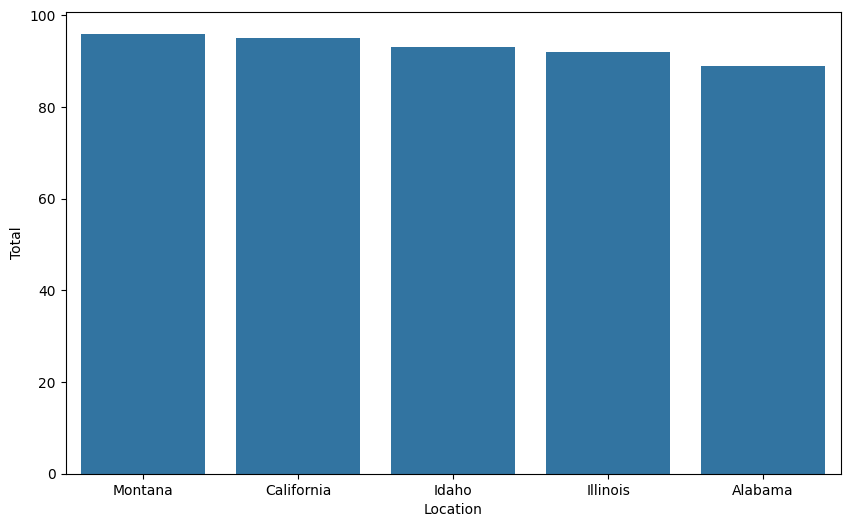

In [271]:
# menggunakan bar chart untuk memvisualisasikan data top 5 lokasi denngan pembelian produk terbanyak
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Total', data=top_5)

It can be seen from the data and chart above that the 5 locations with the most sales do not have a large gap from one location to another. But by looking at the numerical data, it can be seen that the Montana location has the highest total sales with sales of 96, followed by the California and Idaho locations with a fairly thin difference.

**Q4 : What is the average expenditure to buy a product based on gender**

In [272]:
# Mencari rata-rata pengeluaran berdasarkan Gender
gender = df.groupby('Gender')['Purchase Amount (USD)'].mean().reset_index()
gender

,Gender,Purchase Amount (USD)
0,Female,60.249199
1,Male,59.536199


The average female expenditure was 60.249199 and the average male expenditure was 59.536199.

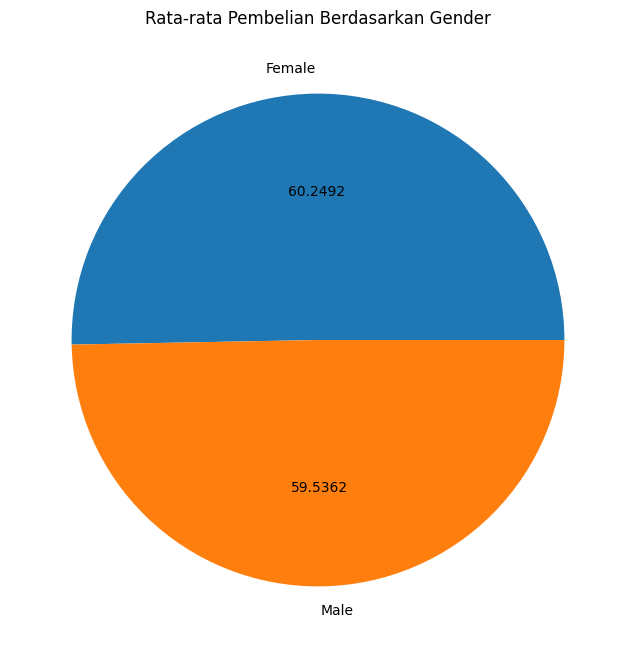

In [273]:
# Menampilkan hasil rata-rata menggunakan pie chart
gender.plot.pie(y='Purchase Amount (USD)',labels=gender.Gender,autopct=lambda pct: f"{pct/100.*sum(gender['Purchase Amount (USD)']):.4f}", figsize=(8,8), legend=False)
plt.title('Rata-rata Pembelian Berdasarkan Gender')
plt.ylabel('')
plt.show()

As can be seen from the pie chart above, purchases based on gender are mostly made by women followed by men.

**Q5 : How does rating relate to buyer's age, price, and previous purchases**?

Checking relationships using heatmaps

<Axes: >

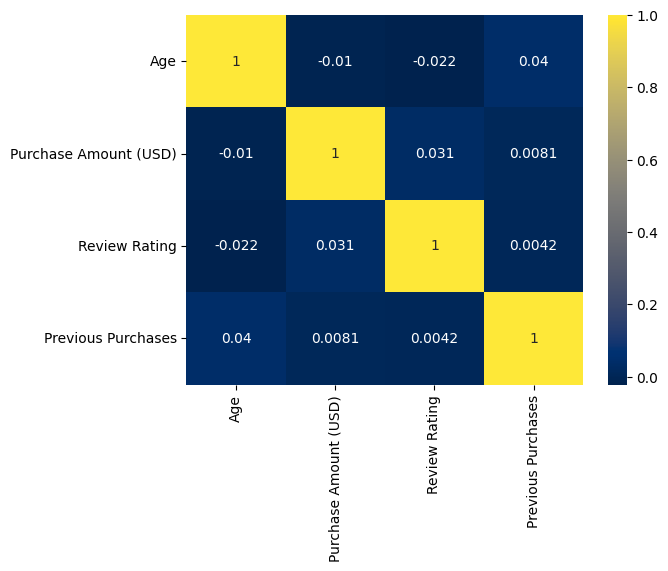

In [274]:
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), cmap='cividis', annot=True)

Checking the normality of data distribution using the Shapiro-Wilk Test statistical test.

In [275]:
for column in numeric_df.columns:
    stat, p = stats.shapiro(numeric_df[column])
    print(f'kolom : {column}')
    print(f"uji normalitas: {stat:.4f}, p-value: {p}")
    if p > 0.05:
        print(f'Data {column} berdistribusi normal.\n')
    else:
        print(f'Data {column} tidak berdistribusi normal.\n')

kolom : Age
uji normalitas: 0.9550, p-value: 4.4223607253491293e-33
Data Age tidak berdistribusi normal.

kolom : Purchase Amount (USD)
uji normalitas: 0.9502, p-value: 1.8058719079330814e-34
Data Purchase Amount (USD) tidak berdistribusi normal.

kolom : Review Rating
uji normalitas: 0.9556, p-value: 6.472653931291532e-33
Data Review Rating tidak berdistribusi normal.

kolom : Previous Purchases
uji normalitas: 0.9541, p-value: 2.3278248507776526e-33
Data Previous Purchases tidak berdistribusi normal.



It can be seen that all data used in Q5 is not normally distributed.

Checking the highest and lowest factor correlation values using the Spearman correlation test.

Hypothesis
- H0 : There is no correlation between the rating data and the factor
- H1 : There is a correlation between the rating data and the factor

In [276]:
# Faktor tertinggi (berdasarkan heatmap) = hubungan rating dengan Purchase Amount (USD)
corr_rho, pval_s = stats.spearmanr(df['Review Rating'], df['Purchase Amount (USD)'])
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

rho-correlation: 0.03, p-value: 0.057823603783096554


In [277]:
# Faktor terendah (berdasarkan heatmap) = hubungan rating dengan Age
corr_rho, pval_s = stats.spearmanr(df['Review Rating'], df['Age'])
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

rho-correlation: -0.02, p-value: 0.17016915148089123


It can be seen that there is no rating correlation with the highest (Purchase Amount (USD)) and lowest (Age) factors.

**Q6 : Is there a difference in total sales in summer and winter**?

Hypothesis
- H0 : There is no significant difference in total sales between summer and winter.
- H1 : There is a significant difference in total sales between summer and winter.

In [278]:
#filter data buat kedua musim 
summer_df = df[df['Season'] == 'Summer'].count()
winter_df = df[df['Season'] == 'Winter'].count()

#hitung t-tes
t_statistic, p_value = ttest_ind(summer_df, winter_df)

#print hasil
print("T-statistic:", t_statistic)
print("P-value:", p_value)

#interpretasi hasil
if p_value < 0.05:
    print("Menolak hipotesis nol. Terdapat perbedaan yang signifikan dalam total pembelian antara Musim Panas dan Musim Dingin.")
else:
    print("Gagal menolak hipotesis nol. Tidak ada perbedaan yang signifikan dalam total pembelian antara Musim Panas dan Musim Dingin.")

T-statistic: -2.0693813896588775
P-value: 0.0516787163384308
Gagal menolak hipotesis nol. Tidak ada perbedaan yang signifikan dalam total pembelian antara Musim Panas dan Musim Dingin.


It can be seen from the results above that there is no significant difference in total purchases between summer and winter.

# Conclusion

- Q1 : Sales per category were highest in the Clothing category, followed by the Accessories and Footwear categories.
- Actionable insight: means it can be concluded that the demand for the clothing category is higher than the other categories, to increase sales can be focused on selling the category.

- Q2 : It can be seen from the graph above, that most buyers are in the 46-50 age range and the least purchase age range is in the 66-70 range. 
- Actionable insight: With this, the team should customize the products based on the age range of the most buyers, by following the appropriate trends in order to attract more buyers.

- Q3 : It can be seen that the Montana location has the most total sales, followed by the California and Idaho locations with a fairly thin difference. 
- Actionable insight: For locations, since there is no significant difference in the top 5 locations, the team can focus on increasing sales evenly and not focusing too much on one location.

- Q4 : As can be seen from the pie chart above, spending by gender is mostly done by women with 60,249 and men with 59,536. 
- Actionable insight: There is no significant difference in spending by gender. Therefore, the team can focus on sales in both genders.

- Q5 : It can be seen that there is no correlation of ratings with the highest (Purchase Amount (USD)) and lowest (Age) factors. It can be concluded that factors such as price, previous purchases, and age have no relationship with review ratings. 

- Q6 : It can be seen from the above results that there is no significant difference in total purchases between summer and winter.

With the above conclusions and some actionable insights, it can be concluded that sales strategies can be improved by improving several factors such as category, age, location, and gender so that increased sales can be achieved.